# Building an atomic structure with Atomic Simulation Environment (ASE)

This notebook will walk you through creating a couple of atomic structures. You'll need to either download this file or clone the tutorial repo to run the code.

Today we will be creating two POSCAR files to be used for VASP calculations, however, ASE can be used to create structures for any simulation. Their [list of output formats](https://ase-lib.org/ase/io/io.html#ase.io.write) is very long!

Here are our import statements that will allow us to use the ASE modules. Run this first.

In [ ]:
from ase.io import write
from ase.visualize import view
from ase.build import graphene, sort

We will make two structures from this paper:

**Evaluating the Catalytic Efficiency of Paired, Single-Atom Catalysts for the Oxygen Reduction Reaction**, Michelle A. Hunter, Julia M. T. A. Fischer, Qinghong Yuan, Marlies Hankel, and Debra J. Searles, *ACS Catalysis* **2019** *9* (9), 7660-7667
DOI: [10.1021/acscatal.9b02178](https://pubs.acs.org/doi/10.1021/acscatal.9b02178)

They will resemble the two images in the graphical abstract:

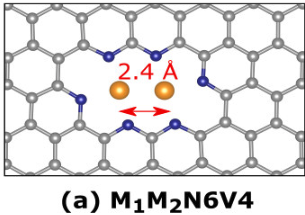 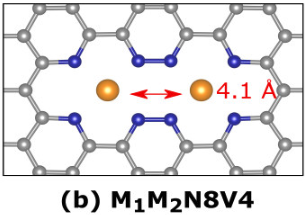

## Step 1: Create a graphene `Atoms` object

These structures are based on a graphene lattice, so we can use ASE's [`build.graphene`](https://ase-lib.org/ase/build/surface.html#ase.build.graphene) function as a starting point. For more info on other in-built lattices, see [ASE's build documentation](https://ase-lib.org/ase/build/build.html#module-ase.build).

The paper gives us details on the structural models used:
> A 8 × 8 graphene supercell was used, with lattice dimensions 19.74 × 17.09 Å in the basal plane and 20 Å perpendicular to ensure a sufficiently large vacuum.

Run the cell below to create a single-layer graphene structure with these parameters. We are storing this structure in a variable called `graphene_monolayer`.

In [ ]:
graphene_monolayer = graphene(
    formula='C2', # You can replace this with something else like CN or N2 to make a structure with different atoms.
    a=2.4675, # This is just the experimental lattice constant of graphene. You can make it any size.
    thickness=0.0, # Zero thickness means one layer. 
    size=(8, 8, 1), # Size given in the paper
    vacuum=10.0 # The number here will be half the total cell size in the z-direction.
    )

We've just created an [ASE `Atoms` object](https://ase-lib.org/ase/atoms.html). Run the cell below and you'll see that the `graphene_monolayer` variable contains something called `Atoms`. Check that the cell dimensions match the paper!

In [ ]:
graphene_monolayer

An `Atoms` object has attributes of an atomic structure. Let's print some of them to have a look.

In [ ]:
print("Periodic Boundaries:\n", graphene_monolayer.pbc, "\n")
print("Cell Matrix:\n", graphene_monolayer.cell, "\n")
print("Atomic Numbers:\n", graphene_monolayer.numbers, "\n")
print("Atomic Positions:\n", graphene_monolayer.positions)

Each `Atoms` object is made up of `Atom` objects. The code below will give us the first `Atom` in `graphene_monolayer`.

In [ ]:
graphene_monolayer[0]

We can also access attributes of each `Atom` within `graphene_monolayer`:

In [ ]:
print("Atomic Symbol:\n", graphene_monolayer[0].symbol, "\n")
print("Atomic Number:\n", graphene_monolayer[0].number, "\n")
print("Atomic Position:\n", graphene_monolayer[0].position, "\n")
print("Index of Atom within Atoms:\n", graphene_monolayer[0].index)

ASE has it's own `view` function. You can use it to view `Atoms` objects:

In [ ]:
view(graphene_monolayer)

## Step 2: Edit the structure to create CoPtN6V4

Now that we have a basic structure, we can view and edit using the `Atoms.edit()` method.

Let's first make a copy so we keep `graphene_monolayer` as it is. 

In [ ]:
CoPtN6V4_structure = graphene_monolayer.copy()

In [ ]:
CoPtN6V4_structure.edit()

### Using the editing gui:

You'll notice that the cell above continues to run while you have the gui window open. That's what we want, so that your changes will stick when you close the window.

Some tips:
* To delete atoms, you can just select them and press `delete`. 
* To select multiple atoms, you can click and drag or hold `ctrl` while selecting.
* To change the element of selected atoms, press `ctrl+y`.
* To add atoms, press `ctrl+a`.
* When adding atoms, you can first select the atoms that you'd like the new atom to be placed relative to (the origin for the new coordinates will be set in the centre of the atoms you select).

Keep in mind that you can also edit the structure using code!
For example, the following code will change a series of atoms into a nitrogen:
```python
carbons_to_change = [58, 74, 73, 55, 39, 40]
for i in carbons_to_change:
    CoPtN6V4_structure[i].symbol = 'N'
```

Once we're happy, we can write the structure to our desired output. 

In [ ]:
write('output_structures/CoPtN6V4/POSCAR', # If we call it "POSCAR", ASE knows it should be in VASP format :)
        sort(CoPtN6V4_structure), # It's best to use the sort function here, so that your POSCAR is neat.
        format='vasp' # But we can always add a format specification just in case.
        )

## Step 3: YOUR TURN!! Create and write a POSCAR for CoPtN8V4

Have a go creating the other structure. If you'd like a challenge, you can try editing the structure without using the gui.